## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap FIN scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/user/notebooks/pcaps/nmap_fin_scan_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [4]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.054511
Name: time, dtype: float64

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times
#duration_list

0    0.054511
1    0.074316
2    0.054613
3    0.059125
4    0.048696
5    0.063106
6    0.071420
7    0.058194
8    0.062917
9    0.050686
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [8]:
temp.mean()

0    0.059758
dtype: float64

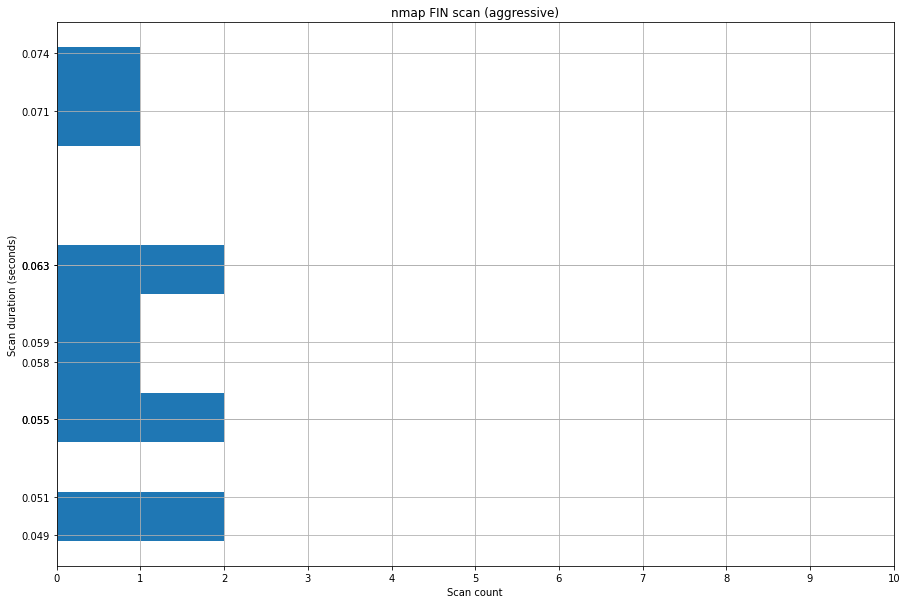

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.059758
std,0.008371
min,0.048696
25%,0.054536
50%,0.058660
75%,0.063059
max,0.074316


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1195.1675415039062



## Order of ports scanned


In [62]:
scannr = []
sport = []
dport = []
ipid = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                ipid.append(scan['ip_id'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport,
                            'ipid': ipid
                           })

1 36700 22
2 36700 53
3 36700 25
4 36700 135
5 36700 111
6 36700 8888
7 36700 3389
8 36700 110
9 36700 3306
10 36700 8080
11 36700 587
12 36700 1025
13 36700 113
14 36700 995
15 36700 143
16 36700 445
17 36700 5900
18 36700 993
19 36700 256
20 36700 554
21 36700 21
22 36700 1723
23 36700 443
24 36700 1720
25 36700 139
26 36700 23
27 36700 80
28 36700 199
29 36700 161
30 36700 5962
31 36700 6005
32 36700 9002
33 36700 2260
34 36700 7007
35 36700 9999
36 36700 1130
37 36700 2046
38 36700 2040
39 36700 9071
40 36700 17988
41 36700 4445
42 36700 5214
43 36700 2111
44 36700 33899
45 36700 2144
46 36700 10628
47 36700 1152
48 36700 9929
49 36700 2001
50 36700 5060
51 36700 1687
52 36700 52848
53 36700 7921
54 36700 1047
55 36700 61900
56 36700 2920
57 36700 10012
58 36700 667
59 36700 1248
60 36700 1198
61 36700 13722
62 36700 5811
63 36700 1083
64 36700 1074
65 36700 366
66 36700 5963
67 36700 55055
68 36700 1075
69 36700 1658
70 36700 1076
71 36700 3325
72 36700 49157
73 36700 1044
74 3670

602 36700 1900
603 36700 5226
604 36700 1187
605 36700 254
606 36700 1067
607 36700 5061
608 36700 9200
609 36700 5925
610 36700 44442
611 36700 2525
612 36700 683
613 36700 10004
614 36700 3689
615 36700 63331
616 36700 1311
617 36700 2393
618 36700 3889
619 36700 4998
620 36700 1688
621 36700 3527
622 36700 20031
623 36700 3371
624 36700 1862
625 36700 32770
626 36700 10626
627 36700 8291
628 36700 6969
629 36700 13
630 36700 389
631 36700 31038
632 36700 1201
633 36700 3476
634 36700 1783
635 36700 44443
636 36700 7435
637 36700 9503
638 36700 5862
639 36700 55600
640 36700 9050
641 36700 1035
642 36700 1104
643 36700 6839
644 36700 1002
645 36700 5080
646 36700 9040
647 36700 1149
648 36700 1277
649 36700 500
650 36700 54328
651 36700 16000
652 36700 212
653 36700 458
654 36700 65000
655 36700 11111
656 36700 668
657 36700 179
658 36700 1501
659 36700 2557
660 36700 8292
661 36700 35500
662 36700 1175
663 36700 1840
664 36700 1111
665 36700 4444
666 36700 1271
667 36700 163
668 367

601 40197 26
602 40197 1021
603 40197 1900
604 40197 1533
605 40197 42510
606 40197 5904
607 40197 1141
608 40197 9595
609 40197 901
610 40197 99
611 40197 5051
612 40197 50636
613 40197 32781
614 40197 1163
615 40197 5357
616 40197 1023
617 40197 8899
618 40197 8042
619 40197 417
620 40197 2100
621 40197 2401
622 40197 9999
623 40197 70
624 40197 5009
625 40197 18988
626 40197 1521
627 40197 3703
628 40197 1085
629 40197 1105
630 40197 1043
631 40197 19801
632 40197 2045
633 40197 8193
634 40197 55555
635 40197 1114
636 40197 2909
637 40197 524
638 40197 1947
639 40197 10012
640 40197 8087
641 40197 5003
642 40197 800
643 40197 2119
644 40197 64680
645 40197 389
646 40197 7778
647 40197 2725
648 40197 12174
649 40197 648
650 40197 8652
651 40197 6129
652 40197 3889
653 40197 1272
654 40197 13722
655 40197 1147
656 40197 10024
657 40197 8651
658 40197 1812
659 40197 1042
660 40197 4111
661 40197 5566
662 40197 1132
663 40197 3689
664 40197 990
665 40197 2500
666 40197 5730
667 40197 10

601 48705 1309
602 48705 1137
603 48705 8100
604 48705 1032
605 48705 2099
606 48705 1461
607 48705 43
608 48705 9011
609 48705 1076
610 48705 3071
611 48705 873
612 48705 9100
613 48705 32782
614 48705 14442
615 48705 2288
616 48705 49154
617 48705 2190
618 48705 1011
619 48705 30951
620 48705 5544
621 48705 8193
622 48705 1066
623 48705 25735
624 48705 3689
625 48705 1805
626 48705 1147
627 48705 5101
628 48705 9618
629 48705 20222
630 48705 2020
631 48705 109
632 48705 3268
633 48705 444
634 48705 1085
635 48705 3301
636 48705 6100
637 48705 32779
638 48705 2967
639 48705 2068
640 48705 1192
641 48705 4900
642 48705 416
643 48705 8181
644 48705 783
645 48705 2119
646 48705 987
647 48705 1322
648 48705 49400
649 48705 648
650 48705 7676
651 48705 5033
652 48705 1064
653 48705 2106
654 48705 880
655 48705 3367
656 48705 27353
657 48705 1130
658 48705 4004
659 48705 65129
660 48705 7201
661 48705 27356
662 48705 301
663 48705 1863
664 48705 6005
665 48705 9220
666 48705 5200
667 48705 

601 59159 15003
602 59159 1137
603 59159 2381
604 59159 481
605 59159 1010
606 59159 49157
607 59159 31038
608 59159 6788
609 59159 8194
610 59159 32779
611 59159 1494
612 59159 52869
613 59159 1100
614 59159 5901
615 59159 1105
616 59159 1098
617 59159 2119
618 59159 1301
619 59159 222
620 59159 1580
621 59159 6510
622 59159 19350
623 59159 1117
624 59159 5850
625 59159 3324
626 59159 6692
627 59159 711
628 59159 1524
629 59159 8087
630 59159 1594
631 59159 465
632 59159 2042
633 59159 9666
634 59159 777
635 59159 6667
636 59159 1043
637 59159 14238
638 59159 255
639 59159 42510
640 59159 2161
641 59159 1583
642 59159 2394
643 59159 1218
644 59159 2383
645 59159 4045
646 59159 20005
647 59159 787
648 59159 3367
649 59159 1287
650 59159 1053
651 59159 55555
652 59159 10180
653 59159 2135
654 59159 1131
655 59159 1271
656 59159 1030
657 59159 1078
658 59159 3914
659 59159 1082
660 59159 264
661 59159 2105
662 59159 646
663 59159 60443
664 59159 21571
665 59159 3052
666 59159 19801
667 5

600 33140 555
601 33140 726
602 33140 1065
603 33140 687
604 33140 49165
605 33140 5901
606 33140 2200
607 33140 2809
608 33140 6881
609 33140 416
610 33140 3269
611 33140 2121
612 33140 1236
613 33140 3367
614 33140 500
615 33140 765
616 33140 1198
617 33140 3221
618 33140 9900
619 33140 50800
620 33140 711
621 33140 8192
622 33140 417
623 33140 5280
624 33140 27355
625 33140 1322
626 33140 1717
627 33140 4125
628 33140 981
629 33140 5087
630 33140 593
631 33140 4321
632 33140 23502
633 33140 8007
634 33140 44501
635 33140 389
636 33140 1072
637 33140 5061
638 33140 6005
639 33140 10003
640 33140 5500
641 33140 20
642 33140 65389
643 33140 6646
644 33140 9003
645 33140 406
646 33140 1259
647 33140 714
648 33140 512
649 33140 56738
650 33140 8701
651 33140 1233
652 33140 2718
653 33140 16992
654 33140 497
655 33140 50002
656 33140 1272
657 33140 3077
658 33140 20000
659 33140 1053
660 33140 5555
661 33140 1914
662 33140 3784
663 33140 8651
664 33140 49159
665 33140 999
666 33140 1038
6

600 41131 6004
601 41131 8001
602 41131 30718
603 41131 30000
604 41131 500
605 41131 49152
606 41131 1718
607 41131 3690
608 41131 691
609 41131 9071
610 41131 1199
611 41131 8000
612 41131 4
613 41131 17877
614 41131 4129
615 41131 9090
616 41131 49167
617 41131 5666
618 41131 5414
619 41131 1217
620 41131 1060
621 41131 1043
622 41131 1053
623 41131 4002
624 41131 20031
625 41131 10024
626 41131 7777
627 41131 8042
628 41131 1259
629 41131 1688
630 41131 5280
631 41131 50003
632 41131 3703
633 41131 9002
634 41131 1666
635 41131 10012
636 41131 32773
637 41131 1721
638 41131 7921
639 41131 6156
640 41131 254
641 41131 5678
642 41131 15004
643 41131 1024
644 41131 1914
645 41131 1044
646 41131 5009
647 41131 7007
648 41131 1244
649 41131 9003
650 41131 1076
651 41131 3013
652 41131 10000
653 41131 417
654 41131 2033
655 41131 667
656 41131 2718
657 41131 808
658 41131 1201
659 41131 3869
660 41131 1030
661 41131 50636
662 41131 2200
663 41131 705
664 41131 8333
665 41131 1011
666 411

600 45135 9898
601 45135 32784
602 45135 1002
603 45135 52822
604 45135 1063
605 45135 10215
606 45135 2288
607 45135 6666
608 45135 19283
609 45135 32772
610 45135 4004
611 45135 8200
612 45135 1130
613 45135 7106
614 45135 1149
615 45135 8001
616 45135 5679
617 45135 8300
618 45135 5633
619 45135 15004
620 45135 8290
621 45135 2251
622 45135 3011
623 45135 3369
624 45135 2008
625 45135 11110
626 45135 1658
627 45135 1095
628 45135 6001
629 45135 1090
630 45135 2004
631 45135 6346
632 45135 1199
633 45135 52848
634 45135 548
635 45135 2608
636 45135 33
637 45135 212
638 45135 44442
639 45135 49152
640 45135 51493
641 45135 8192
642 45135 1091
643 45135 873
644 45135 3351
645 45135 22939
646 45135 1066
647 45135 211
648 45135 3371
649 45135 9900
650 45135 27715
651 45135 9999
652 45135 8090
653 45135 9595
654 45135 1999
655 45135 3690
656 45135 5120
657 45135 9878
658 45135 1148
659 45135 1914
660 45135 9500
661 45135 10626
662 45135 7938
663 45135 4000
664 45135 8994
665 45135 625
666

186 38129 548
187 38129 2135
188 38129 20000
189 38129 12265
190 38129 9503
191 38129 2030
192 38129 1081
193 38129 1097
194 38129 1149
195 38129 1065
196 38129 2383
197 38129 5999
198 38129 2394
199 38129 22939
200 38129 3659
201 38129 1783
202 38129 2557
203 38129 2008
204 38129 5877
205 38129 5033
206 38129 32774
207 38129 1110
208 38129 49152
209 38129 13722
210 38129 8654
211 38129 64623
212 38129 1311
213 38129 49176
214 38129 1875
215 38129 5679
216 38129 1123
217 38129 7004
218 38129 2009
219 38129 6502
220 38129 9102
221 38129 79
222 38129 3580
223 38129 20828
224 38129 27353
225 38129 32784
226 38129 2608
227 38129 800
228 38129 1417
229 38129 5902
230 38129 10012
231 38129 1070
232 38129 616
233 38129 3476
234 38129 617
235 38129 8001
236 38129 1166
237 38129 3367
238 38129 3546
239 38129 83
240 38129 1099
241 38129 1087
242 38129 1805
243 38129 366
244 38129 19
245 38129 10243
246 38129 2809
247 38129 5550
248 38129 992
249 38129 64680
250 38129 13456
251 38129 6543
252 381

766 38129 119
767 38129 427
768 38129 1080
769 38129 7435
770 38129 9000
771 38129 6346
772 38129 340
773 38129 1165
774 38129 1666
775 38129 1217
776 38129 1169
777 38129 2107
778 38129 2170
779 38129 16992
780 38129 1111
781 38129 2022
782 38129 5298
783 38129 3986
784 38129 1075
785 38129 49154
786 38129 3801
787 38129 1163
788 38129 1863
789 38129 9968
790 38129 7920
791 38129 32783
792 38129 82
793 38129 3784
794 38129 2021
795 38129 1067
796 38129 9002
797 38129 3889
798 38129 444
799 38129 2909
800 38129 2702
801 38129 90
802 38129 2035
803 38129 2005
804 38129 6839
805 38129 3
806 38129 7777
807 38129 1154
808 38129 9011
809 38129 5631
810 38129 10000
811 38129 6129
812 38129 2033
813 38129 990
814 38129 1521
815 38129 52673
816 38129 2160
817 38129 666
818 38129 89
819 38129 1047
820 38129 3323
821 38129 1009
822 38129 20031
823 38129 2196
824 38129 8333
825 38129 8180
826 38129 5678
827 38129 6112
828 38129 1059
829 38129 4045
830 38129 2323
831 38129 3998
832 38129 1114
833 

385 52497 10616
386 52497 1138
387 52497 82
388 52497 3221
389 52497 1111
390 52497 16001
391 52497 32776
392 52497 17
393 52497 8045
394 52497 32769
395 52497 1099
396 52497 1077
397 52497 7676
398 52497 10000
399 52497 3828
400 52497 13
401 52497 1070
402 52497 8333
403 52497 32771
404 52497 1935
405 52497 6106
406 52497 1030
407 52497 464
408 52497 9594
409 52497 5631
410 52497 8081
411 52497 49161
412 52497 50636
413 52497 8082
414 52497 726
415 52497 3128
416 52497 32775
417 52497 1102
418 52497 5050
419 52497 1494
420 52497 7025
421 52497 1052
422 52497 1037
423 52497 1094
424 52497 2196
425 52497 6669
426 52497 84
427 52497 10010
428 52497 990
429 52497 9502
430 52497 5001
431 52497 19801
432 52497 1259
433 52497 6000
434 52497 5280
435 52497 2043
436 52497 2041
437 52497 2048
438 52497 2725
439 52497 3801
440 52497 2106
441 52497 9100
442 52497 34572
443 52497 3905
444 52497 24444
445 52497 49154
446 52497 5061
447 52497 1001
448 52497 9666
449 52497 1110
450 52497 8400
451 524

932 52497 444
933 52497 5952
934 52497 2103
935 52497 8701
936 52497 25735
937 52497 7512
938 52497 50800
939 52497 90
940 52497 5414
941 52497 34571
942 52497 2161
943 52497 15000
944 52497 144
945 52497 49163
946 52497 1334
947 52497 5730
948 52497 1042
949 52497 3001
950 52497 5298
951 52497 10778
952 52497 1119
953 52497 61532
954 52497 5850
955 52497 32770
956 52497 6668
957 52497 32778
958 52497 6567
959 52497 1038
960 52497 1073
961 52497 1236
962 52497 3580
963 52497 1175
964 52497 5405
965 52497 513
966 52497 9968
967 52497 49158
968 52497 1761
969 52497 1095
970 52497 55600
971 52497 2381
972 52497 20828
973 52497 5907
974 52497 563
975 52497 5902
976 52497 912
977 52497 7106
978 52497 1062
979 52497 3869
980 52497 5051
981 52497 32782
982 52497 50300
983 52497 255
984 52497 9876
985 52497 2021
986 52497 222
987 52497 5666
988 52497 1051
989 52497 3324
990 52497 2366
991 52497 3390
992 52497 8084
993 52497 1755
994 52497 5566
995 52497 1027
996 52497 6839
997 52497 1272
998 5

In [46]:
orders_port

,scannr,sport,dport,ipid
0,1,36700,22,44901
1,2,36700,53,41685
2,3,36700,25,61653
3,4,36700,135,14326
4,5,36700,111,6728
...,...,...,...,...
9995,996,61048,5544,48114
9996,997,61048,9917,34424
9997,998,61048,5901,10906
9998,999,61048,3971,10667


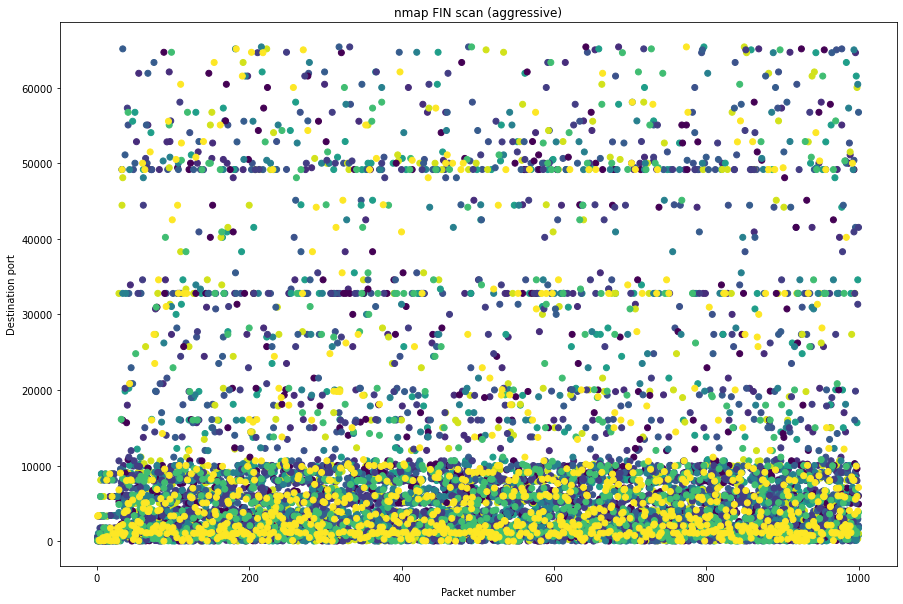

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

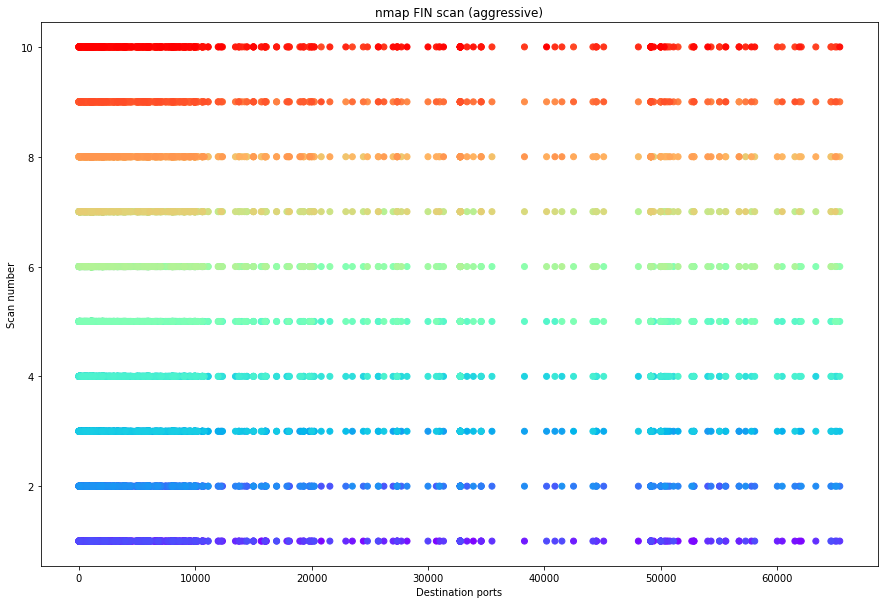

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

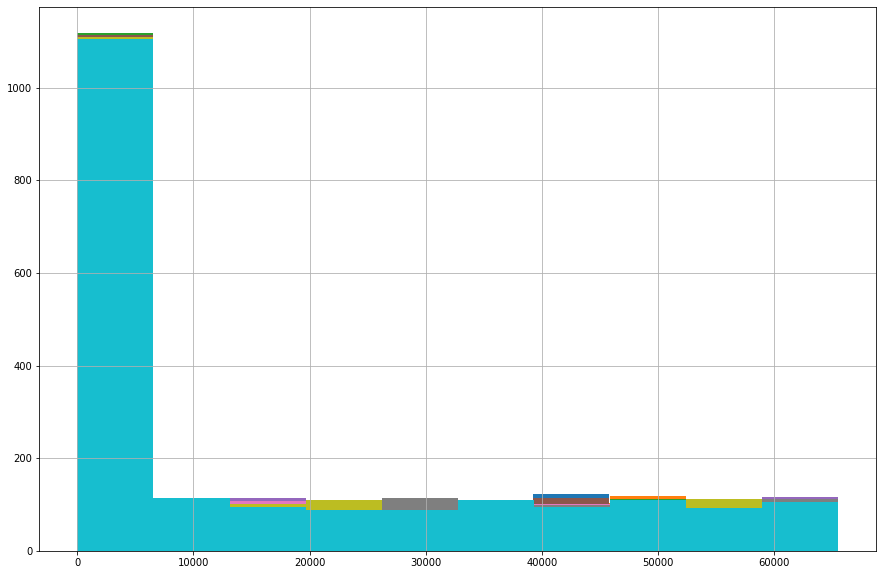

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

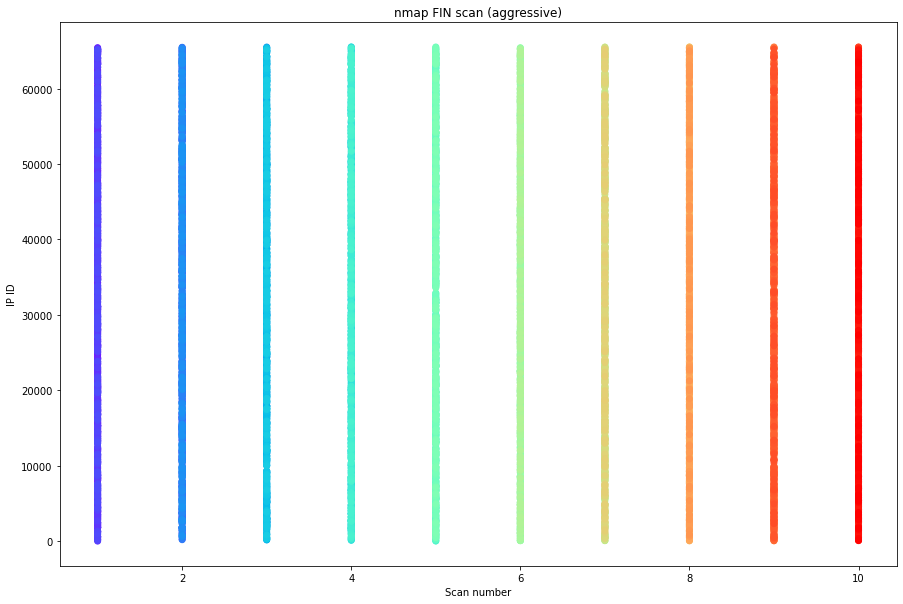

In [41]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)

x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

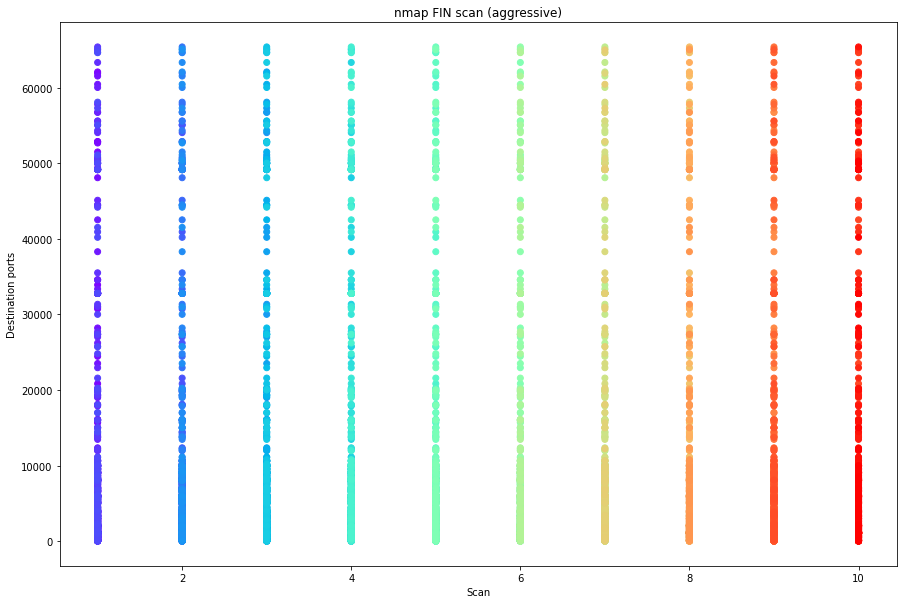

In [64]:
ip_ids = []
scan_number = []
scan_nr = 0
dst_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

            

if dst_ports:
    x = scan_number
    ys = dst_ports

    colors = cm.rainbow(np.linspace(0, 1, len(ip_ids)))
    plt.xlabel('Scan')
    plt.ylabel('Destination ports')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

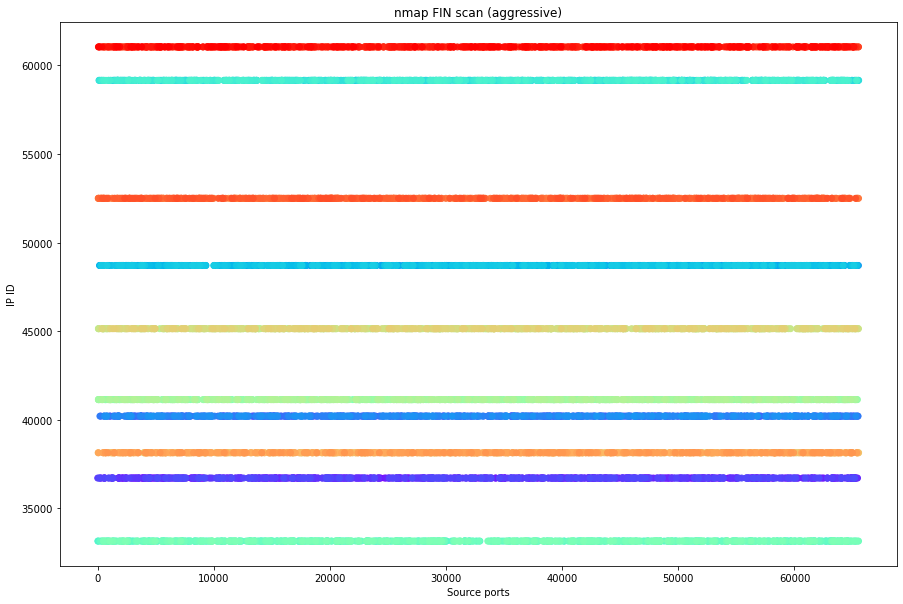

In [27]:
ip_ids = []
scan_number = []
#scan_nr = 0
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids



    colors = cm.rainbow(np.linspace(0, 1, len(ys)))

    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 410

Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 410

Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
S

Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 114

Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 114

Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 314

Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 149

Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 232

Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 232

Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
S

Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
S

Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 364

Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 364

Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 419

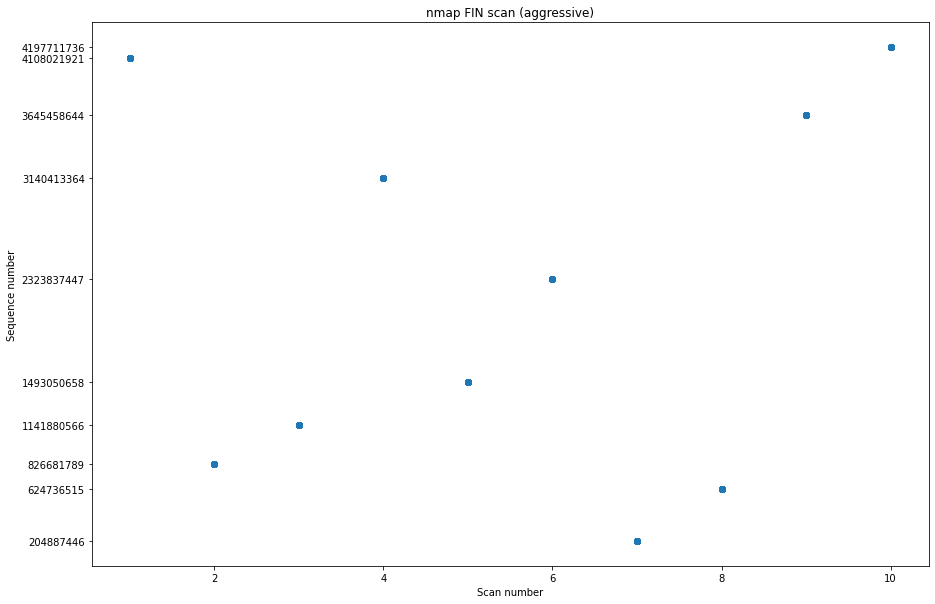

In [31]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


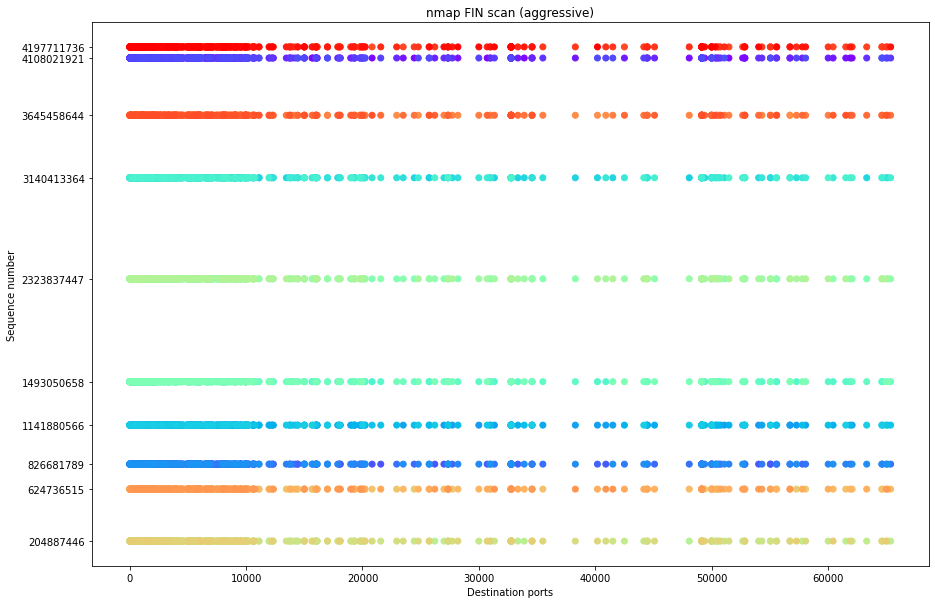

In [32]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

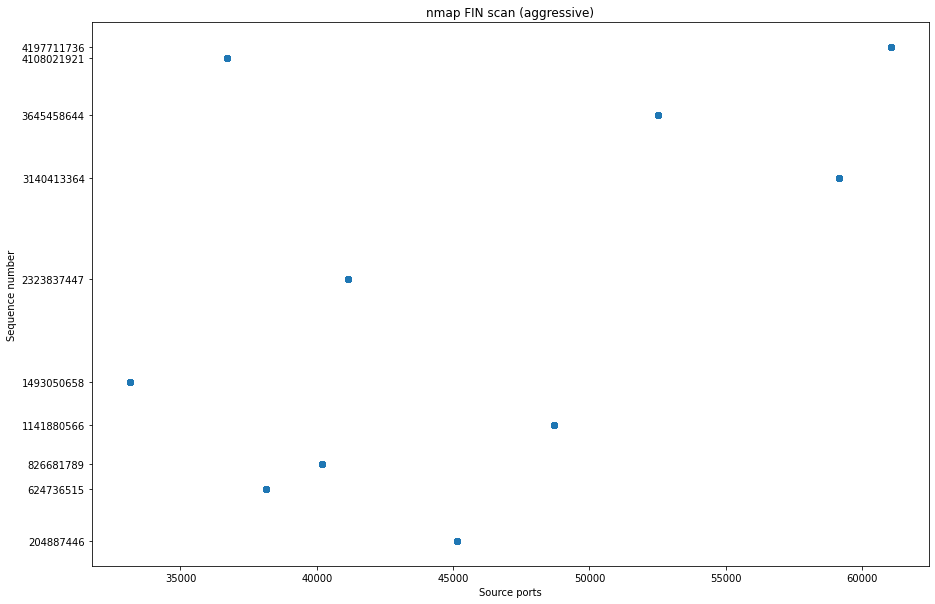

In [33]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [66]:
len(set(orders_port['sport']))

10

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F